<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/Computational_neuroscience_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Neuroscience
## Exercises week 1 (nonlinear dynamics)

```python
Students = {s1066862: 'Daphne Cornelisse', s4572408: 'Kyra Evers'}
```

In [1]:
# @title Dependencies
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from pylab import *
import numpy as np
import math

### Question 1. Newton's method 
We can identify the type of bifurcation by looking at the fixed points. We need to find the roots, i.e. $f(x)=0$ (where the function changes sign). Newton's method is a way to find such roots.

- Start with arbitrary initial value $x_0$ where $x_0 \neq 0$
- Want to find a new point $x_{n+1} = x + h$ that is closer to $0. \Rightarrow$ $f(x_{n+1}) = f(x_n + h)= f(x_n) + hf'(x_n)=0)$
- We do $x_{n+1}= x_n - \frac{f(x_n)}{f'(x_n)}$

---

### 1a) Solve using Newton's method by hand

We use $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ to get increasingly closer to the roots with initial value $x_1=2$. With this initial value we arrive at the roots with accuracy up to two decimal points [the exercise did not specify the number of decimal points] in just 3 iterations. 

$$
x_1 = 2 \\
x_2 = 2 - \frac{f(2)}{f'(2)} = 2 - \frac{1}{2} = \frac{3}{2} \\
x_3 = \frac{3}{2} - \frac{f(3/2)}{f'{3/2}} = \frac{3}{2} - \frac{1/4}{3} = \frac{17}{12} = 1.4166 \approx \sqrt{2}
$$

### 1b) Implement Newton's method

We want to find the roots of the following function

$$
f(x) = x \exp(-x) + 1
$$

In [2]:
# define f(x)
f = lambda x,a: x * np.exp(-x) + a

# define df
df = lambda x,a: - np.exp(-x) * (x - 1)

# define range of input values 
function_values = f(np.linspace(-3, 3, num=100), a=1)

As suggested, we plot the function to make sure is not a nonsense function

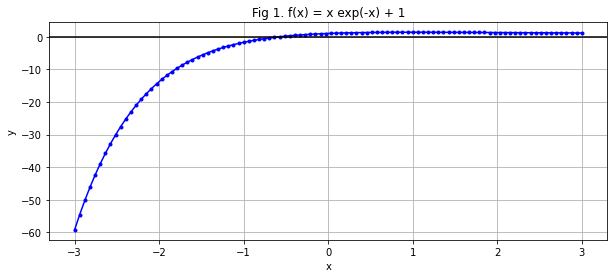

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(np.linspace(-3, 3, num=100), function_values, 'b.-');
ax.axhline(y=0, color='k', linestyle='-');
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Fig 1. f(x) = x exp(-x) + 1")
plt.grid(True);

In [4]:
def newtons_method(f, df, x0, tolerance, iterations, a=1, verbose=True):
  '''Approximate solutions to f(x)=0 with Newton's method

  Parameters
  ----------
  f: function for which we want to find the roots

  df: the derivative of f(x)

  x0: initial value (guess)

  tolerance: stop when the function value at x is "close enough" to zero => abs(f(x)) < tolerance

  iterations: search is terminated after certain number of iterations

  Returns
  -------

  xn: approximate the roots in an iterative way with
      x = xn - f(xn)/df(xn)
  '''

  xn = x0 # first x is the initial guess

  for n in range(0, iterations):
    fxn = f(xn,a) # obtain function value
    
    if abs(fxn) < tolerance:

      if verbose == True:
        print(f'The solution is {xn}, found after {n} steps')
        # display function for range of input values 

        fig, ax = plt.subplots(1, 1, figsize=(10,4))
        ax.plot(np.linspace(-3, 3, num=100), function_values, 'b.-');
        ax.axhline(y=0, color='r', linestyle='-');
        ax.set_title("Fig 2. Newton's method to find solution to f(x) = x exp(-x) + 1 = 0");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.plot(xn, 0, 's', color='k')
        plt.grid(True);
      return xn
    
    dfxn = df(xn,a) # obtain derivative at function value

    if df(xn,a) == 0: # if function is not differentiable at this point
      if verbose == True:
        print('Function is not differentiable (df = 0), please try again')
      return 0

    # update xn
    xn -= fxn/dfxn # dfxn = tangent
  
  if verbose == True:
    print('Maximum iterations reached but no solution was found. Try again with a different guess, or check if your function has roots.')
  return 0

In [5]:
newtons_method(f,df,1,0.001,10, verbose=True);

Function is not differentiable (df = 0), please try again


In [6]:
newtons_method(f,df,-10,0.001,10, verbose=True)

Maximum iterations reached but no solution was found. Try again with a different guess, or check if your function has roots.


0

The solution is -0.567143290533261, found after 3 steps


-0.567143290533261

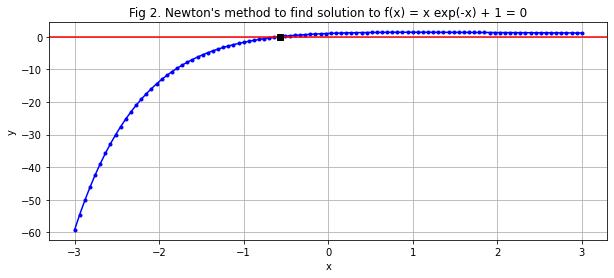

In [7]:
newtons_method(f,df,-0.5,1e-7,10, verbose=True)

Note that a downside of newtons method is that the success of this method depends on the maximum number of iterations allowed and initial value or guess we use. 

As is seen in one call of our function `newtons_method()` above, no solution was found with $x_0=-10$ and a maximum of 10 iterations: more iterations are needed to get to a solution. Furthermore, in order for the method to work the function needs to be differentiable at all points. That is, if the derivative at a point $x_n=0$, we cant use the tangent to get closer to the roots (this is also called a zero-division error). 

### 1c) Construct bifurcation diagram

We have 

$$
f(x) = x e^{-x}+a
$$

note that $f'$ is not affected by the parameter $a$

$$
\frac{df}{dx} = - e^{-x} (x - 1)
$$

In [8]:
a_values = np.linspace(-10, 10, num=100) # generate array with valus for a 
solutions_ourfunc = np.zeros(a_values.shape) 

for i, a in enumerate(a_values):
  approx = newtons_method(f, df, x0=-0.5, tolerance=1e-7, iterations=100, a=a, verbose=False)
  solutions_ourfunc[i] = approx if approx != 0 else np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


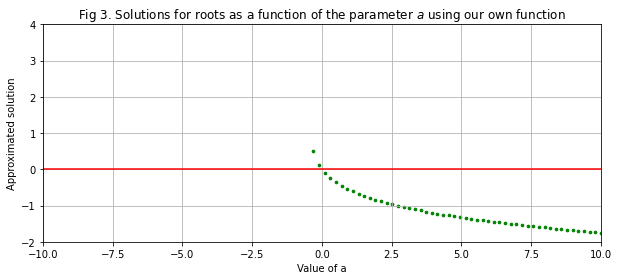

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set_title('Fig 3. Solutions for roots as a function of the parameter $a$ using our own function')
ax.scatter(a_values, solutions_ourfunc, color='g', s=7);
ax.axhline(y=0, color='r', linestyle='-');
ax.set_xlabel('Value of a');
ax.set_xlim(min(a_values), max(a_values))
ax.set_ylabel('Approximated solution')
ax.set_ylim(-2, 4)
ax.grid(True);

### 1d) Zero division errors

Given a function $f(x)$,  [scipy's function `fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) finds x such that $f(x) = 0$ using a starting estimate $x0$.


In [10]:
a_values = np.linspace(-10, 10, num=100) # generate an array with valus for a 
solutions_fsolve = np.zeros(a_values.shape)

for i,a in enumerate(a_values):
  approx = fsolve(f, x0=-0.5, args=(a))
  solutions_fsolve[i] = approx if (f(approx, a) > -1E-12 and f(approx, a) < 1E-12 ) else np.nan # Output nan value if function filled in with solution does not approach zero

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


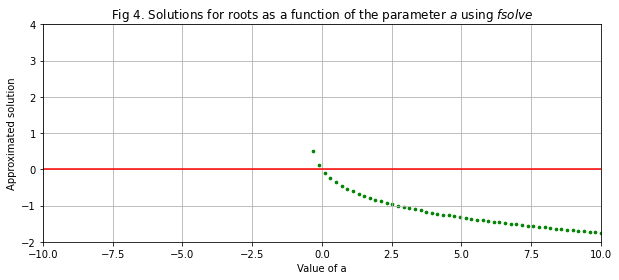

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set_title('Fig 4. Solutions for roots as a function of the parameter $a$ using $fsolve$')
ax.scatter(a_values, solutions_fsolve, color='g', s=7);
ax.axhline(y=0, color='r', linestyle='-');
ax.set_xlabel('Value of a');
ax.set_xlim(min(a_values), max(a_values))
ax.set_ylabel('Approximated solution')
ax.set_ylim(-2, 4)
ax.grid(True);

From *Fig 3 and 4* we can deduce that the solution of $f(x) = x e^{-x}+a = 0$ depends on the value of $a$. This is because the parameter $a$ shifts the function $f(x)$ horizontally. For values where $a \leq -0.3$ there are no roots to be found at the function won't intersect the x-axis at is point. We demonstrated this with a little animation below. Use the slider to change the value for $a$ and see what happens!

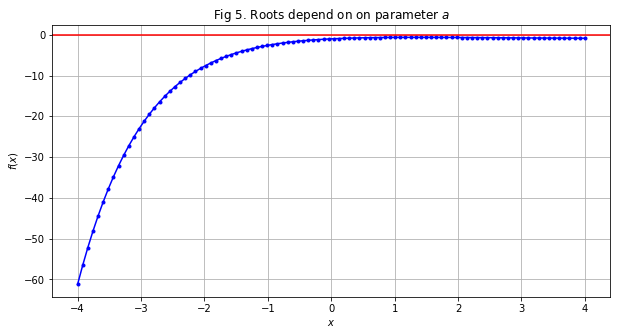

In [12]:
#@title Change value of a, then run this cell
a_param = -1 #@param {type:"slider", min:-10, max:10, step:0.5}
#print(number_slider)

# define f(x)
fx = lambda x,a: x * np.exp(-x) + a

# define range of input values 
output = fx(np.linspace(-3, 3, num=100), a_param)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.linspace(-4, 4, num=100), output, 'b.-');
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('Fig 5. Roots depend on on parameter $a$')
ax.axhline(y=0, color='r', linestyle='-');
plt.grid(True);

### Question 2

---
**Euler's method.**

$$
y_{n+1} = y_n + h f(x_n, y_n)
$$

---

---
**Runge-Kutta method**

$$
\tilde y_{n+1} = y_n + hf(x_n,y_n) \\
y_{n+1} = y_n + \frac{1}{2} hf(x_n,y_n) + f(x_n + h, \tilde y_{n+1}))\\
$$

---

Given a differential equation $\dot y = f(x,y)$, we want to find $y$ as a function of $x$

$$
\dot y = f(x,y) = -2x-y
$$
with
$y(0)=-1$ on $ x \in [0,1]$

### 2 (a,b) Solve the differential equation with Euler's method and RK & compare 

In [13]:
# --- Define input range, initial value, differential eq and true solution ---
x = np.linspace(0,1,25) # specify input range
y0 = -1 # initial value
ydot = lambda x,y: -2 * x - y # y' = f(x,y) 
y_true = -2 * x - 3 * np.exp(-x) + 2 # analytical solution

In [14]:
def ode_euler(f, y0, x, h):
  ''' Approximate the solution of y'=f(x,y) with euler's method.
  Parameters
  ----------
  f: the differential equation whose solution we want to approximate

  y0: initial value y(x0) = y0

  x: range of input values (numpy array)

  h: step size

  Returns
  --------
  y: approximation y_n of the solution y(x_n)
  '''
  y = np.zeros(len(x))
  
  y[0] = y0 

  for n in range(0, len(x)-1):
    y[n+1] = y[n] + h * f(y[n], x[n])
  return y

In [15]:
def RK(f, y0, x, h):
  ''' Approximate the solution of y'=f(x,y) with RK method.
  Parameters
  ----------
  f: the differential equation we want to approximate

  y0: initial value y(x=0)=y0

  x: range of input values (numpy array)

  h: step size

  Returns
  --------
  y: approximation y_n of the solution y(x_n)
  '''
  y = np.zeros(len(x))
  
  y[0] = y0 

  for n in range(0, len(x)-1):
    y_wiggle = y[n] + h * f(y[n], x[n])
    y[n+1] = y[n] + h * (1/2) * (f(y[n], x[n]) + f(y_wiggle, x[n+1]))
  return y

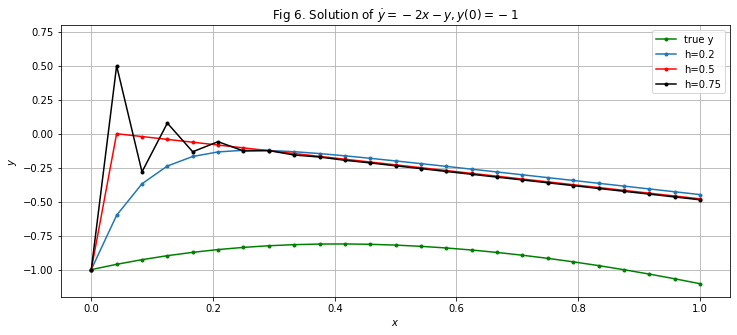

In [16]:
#@title Euler's method with different step sizes h

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.set_title('Fig 6. Solution of $\dot y = -2x -y, y(0)=-1$')
ax.plot(x, y_true,'g.-', label = 'true y') # plot analytical solution
ax.plot(x, ode_euler(ydot, y0, x, h=0.2) ,'.-', label ='h=0.2')
ax.plot(x, ode_euler(ydot, y0, x, h=0.5) ,'r.-', label ='h=0.5')
ax.plot(x, ode_euler(ydot, y0, x, h=0.75) ,'k.-', label ='h=0.75')
ax.set_ylim(-1.2, .8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True);

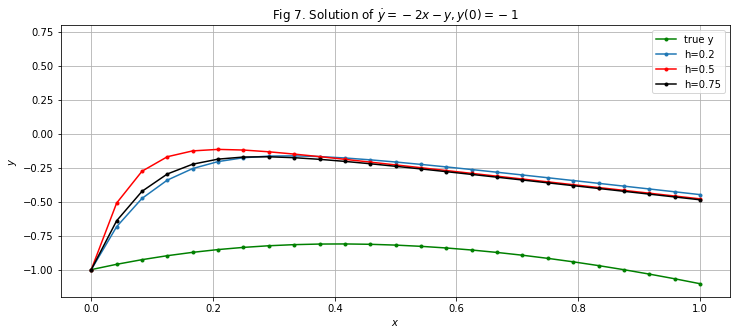

In [17]:
#@title Runge-Kutta method with different step sizes h
fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.set_title('Fig 7. Solution of $\dot y = -2x -y, y(0)=-1$')
ax.plot(x, y_true,'g.-', label = 'true y') # plot analytical solution
ax.plot(x, RK(ydot, y0, x, h=0.2) ,'.-', label ='h=0.2')
ax.plot(x, RK(ydot, y0, x, h=0.5) ,'r.-', label ='h=0.5')
ax.plot(x, RK(ydot, y0, x, h=0.75) ,'k.-', label ='h=0.75')
ax.set_ylim(-1.2, .8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True);

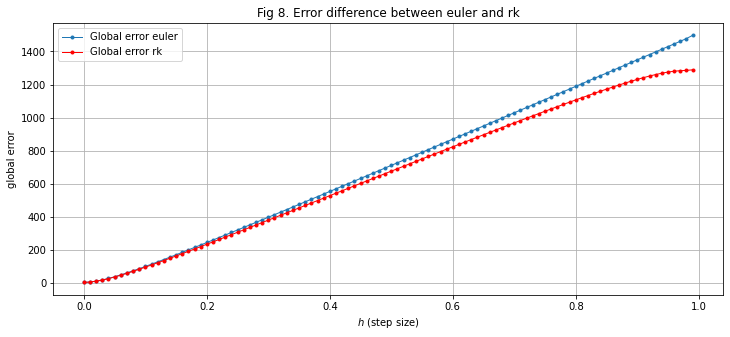

In [18]:
#@title Inspecting the accuracy of Euler and RK methods as a function of the step size, h

h_range = np.arange(0.00001, 1, step=.01) # different step sizes

global_error_eu = 0 
global_error_rk = 0 
h_errors_eu = np.zeros(len(h_range))
h_errors_rk = np.zeros(len(h_range))

for idx, h in enumerate(h_range):
  
  y_approx_eu = ode_euler(ydot, y0, x, h=h)
  y_approx_rk = RK(ydot, y0, x, h=h)

  for i, y_eu in enumerate(y_approx_eu):

    error_eu = abs(y_true[i] - y_eu)
    global_error_eu += error_eu

  for i, y_rk in enumerate(y_approx_rk):

    error_rk = abs(y_true[i] - y_rk)
    global_error_rk += error_rk

  h_errors_eu[idx] = global_error_eu
  h_errors_rk[idx] = global_error_rk

fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(h_range, h_errors_eu, '.-', lw=1, label='Global error euler')
ax.plot(h_range, h_errors_rk, '.-r', lw=1, label='Global error rk')
ax.set_xlabel('$h$ (step size)')
ax.set_title('Fig 8. Error difference between euler and rk')
# ax.set_yscale('log')
ax.set_ylabel('global error')
ax.legend()
ax.grid(True);

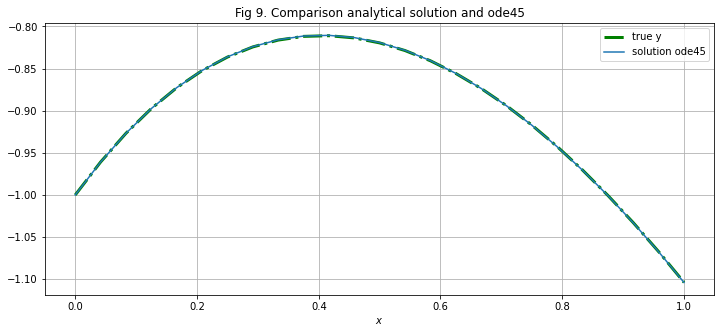

In [19]:
# @title Compare analytical solution with the approximation from 'ode45' (in python: RK45)
# solve with RK45 method
sol45 = solve_ivp(ydot, t_span = [0,1], y0 = [-1], method='RK45', dense_output=True)
z = sol45.sol(x) # specify x range

# x = np.linspace(0, 1, 300)
y_true = -2 * x - 3 * np.exp(-x) + 2 # analytical solution

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.plot(x, y_true,'-.g', label = 'true y', lw=3)
ax.plot(x, z.T, label='solution ode45', lw=1.5)
ax.set_xlabel('$x$')
ax.set_title('Fig 9. Comparison analytical solution and ode45')
ax.legend()
ax.grid(True);

#### 2 (a,b) Conclusions
----

First of all, we note that the RK method (second order) is a much better approximation to the true solution than Euler's method.

Regarding errors, we show in *Fig 8* that the global error of euler's method grows linearly as a function of the step size $h$. Both methods start out with the same accuracy, yet the global error of euler's method grows faster than the modified (rk) method, whose global error grow decays as $h \rightarrow 1$. 

When we plot the RK45 approximation and the true solution they align perfectly. As such we conclude that there is no observable difference and the RK45 method is an accurate approximation for $y$.

### 2c) Reduce second order DE to a system of first order DEs

We were given that

$$
\frac{d^2 \theta}{dt^2} = - \sin (\theta) + I 
$$

and wish to rewrite this as a system of first order differential equations, specifying $y_1$ and $y_2$. We can do so with a simple change of variable. 

$$
y_1 = \theta \\
y_2 = \frac{d{\theta}}{dt} 
$$

Notice that if we differentiate both sides we obtain

$$
\dot y_1 = \frac{d{\theta}}{dt} = y_2 \\
\dot y_2 = \frac{d}{dt} \frac{d{\theta}}{dt} = I - \sin(\theta)
$$

<!-- $$
y_2 = \dot y_1 = \dot \theta = \frac{d \theta}{dt} \\
\dot y_2 = \ddot \theta = \frac{d^2 \theta}{dt^2} \\
$$ -->

We can integrate $\dot y_2$ to find $y_2$

$$
y_2 = \int -sin(\theta) + \, I\:dt \\
= I t + \cos(\theta) + c \\
$$

### 2d) Phase plane with modified euler method





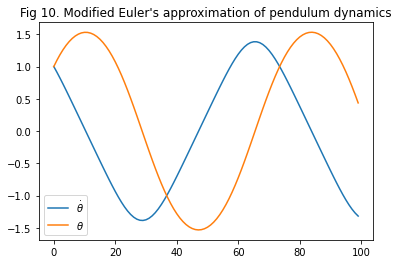

In [20]:
#@title Modified Euler's approximation of pendulum dynamics
I = 0 #@param {type:"slider", min:-10, max:10, step:0.5}

# Modified Euler: 
n = 100 # nr of timesteps
y = np.zeros(n)
x = np.ones(n)
y0 = 1 
x0 = 1
h = 0.1
y[0] = y0 
x[0] = x0

for n in range(0, n-1):

  # At n+1, what are the derivative of y and x?
  x_prime = (y[n])
  x[n+1] = x[n] + h * x_prime # derivative of x -> x' = y

  y_prime = (-np.sin(x[n]) + I)
  y[n+1] = y[n] + h * y_prime
  x_prime_new = (y[n+1])
  y_prime_new = (-np.sin(x[n+1]) + I)

  # Now overwrite these steps
  x[n+1] = x[n] + h * (1/2) * (x_prime + x_prime_new) # derivative of x -> x' = y
  y[n+1] = y[n] + h * (1/2) * (y_prime + y_prime_new)

plt.plot(arange(n+2), y, label = r"$\dot \theta$")
plt.plot(arange(n+2), x, label = r"$\theta$")
plt.title('Fig 10. Modified Euler\'s approximation of pendulum dynamics')
plt.legend();

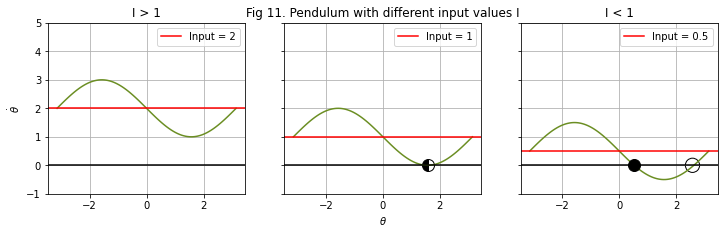

In [21]:
#@title Bonus: pendulum with different input values *I*
theta = np.linspace(-pi, pi, 100)
theta_dot = lambda I: I + -sin(theta)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex = True, sharey = True)
I = 2
ax1.grid(True)
ax1.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax1.set_ylabel(r'$\dot \theta  $')
ax1.set_title('I > 1')
ax1.set_ylim(-1, 5)
ax1.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax1.axhline(y=0, color='k', linestyle='-')
ax1.legend()
ax1.set_aspect(1)

I = 1
ax2.grid(True)
ax2.plot(pi/2, 0, fillstyle="left", color='black', linestyle=':', marker='o',
                    markersize=12, markerfacecoloralt='white')
ax2.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax2.set_xlabel(r"$\theta$")
ax2.set_title('I = 1')
ax2.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax2.axhline(y=0, color='k', linestyle='-')
ax2.legend()
ax2.set_aspect(1)
ax2.set_title('Fig 11. Pendulum with different input values I')

I = 0.5
ax3.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax3.set_title('I < 1')
ax3.plot(pi/6, 0, fillstyle="left", color='black', linestyle=':', marker='o',
                    markersize=12, markerfacecoloralt='black')
draw_circle = plt.Circle((1+pi/2, 0), 0.25, fill = False, edgecolor = 'black')
ax3.set_aspect(1)
ax3.add_artist(draw_circle)
ax3.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax3.axhline(y=0, color='k', linestyle='-')
ax3.legend()
ax3.grid(True)


The behaviour of the pendulum depends on the input $I$, which horizontally translates the sine wave. 
When $I = 1$, i.e. when the input is equal to the amplitude of the sine wave, a saddle-node bifurcation can be found at $\theta = \pi/2$. 
When $I < 1$, there is a stable ($\theta = \frac{\pi}{6}$) and an unstable ($\theta = 1\frac{\pi}{2}$) fixed point.
When $I > 1$, the system does not reach a fixed point because the input is sufficently large to move the sine wave away from crossing the x-axis (when $ \dot\theta = 0)$.

### Phase portrait of a simple pendulum

The phase space or portrait of a vector field shows how the solutions evolve from a given starting point. We plot the phase space as a 2D grid where each point represents a value of $(y_1, y_2)$ and each vector represents the derivative). 

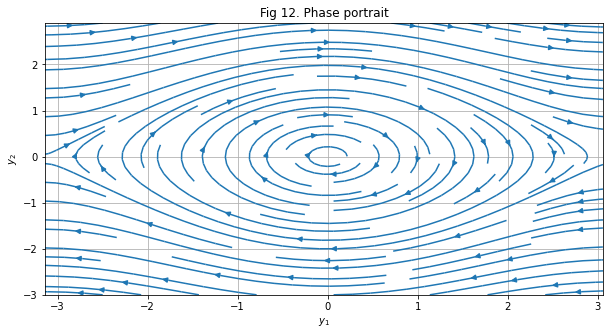

In [22]:
#@title The space space changes for different values of I
I = 0 #@param {type:"slider", min:-10, max:10, step:0.5}

y1_values, y2_values = meshgrid(arange(-pi, pi, 0.1), arange(-3, 3, 0.1))
y1 = y2_values
y2 = -sin(y1_values) + I

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.streamplot(y1_values, y2_values, y1, y2)
ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$')
ax.set_title('Fig 12. Phase portrait')
ax.grid(True)

### 2e) Implement differential equation with 'ode45'

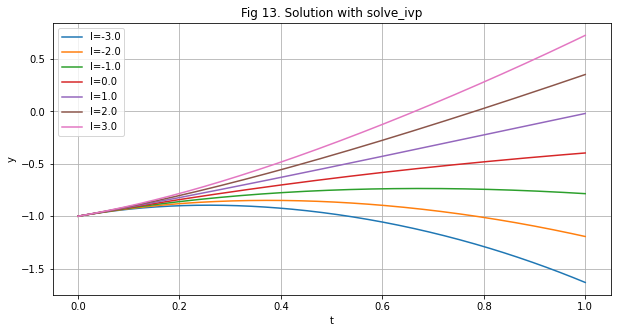

In [23]:
t = np.linspace(0, 1, 300)
I_values = np.linspace(-3, 3, 7)
y2_dot = lambda t, y1, I: -np.sin(y1) + I*t

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for idx,I in enumerate(I_values):
  sol = solve_ivp(y2_dot, t_span = [0,1], y0 = [-1], args = [I], method='RK45', dense_output=True)
  z = sol.sol(t)
  ax.plot(t, z.T, label=(f'I={I}'))
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Fig 13. Solution with solve_ivp')
ax.grid(True)

### 3a) Solve a second-order differential equation analytically

We determine the analytical solution of the *homogeneous* second-order DE 

$$
y'' + by' + y = 0
$$

by following the following 3 steps:

---

(1) Try $y = e^{rx}$ to obtain the characteristic equation $ar^2+br+c=0$

---

---

(2) Solve the characteristic equation, giving $r_1$ and $r_2$ as roots.

---

---

(3) Determine the nature of the solution.

- If $r_1 \neq r_2$ are both real, then the general solution is $y(x) = c_1e^{r_1x}+c_2 e^{r_2x} \Rightarrow$ <font color='blue'>Overdamped</font>

- If $r_{1/2} = \lambda ± i\mu$ form a complex conjugate pair the solution is $y(x) = c_1 e^{\lambda x} \cos (\mu x) + c_2 e^{\lambda x} \sin (\mu x) \Rightarrow$ <font color='red'>Underdamped</font>

- If $r_1 = r_2 = r$, the general solution equals $y(x) = (c_1 + c_2x) e^{rx} \Rightarrow$ <font color='green'>Critically damped</font>


<!-- ![](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.splung.com%2Fkinematics%2Fimages%2Fdamped_oscillations%2Fdamped_oscillations.gif&f=1&nofb=1) -->

---

(1)
$$
(e^{rx})'' + b(e^{rx})' + e^{rx} = 0 \\
e^{rx}(r^2 + br + 1) = 0 \\
r^2 + br + 1 = 0
$$

which is an ordinary quadratic equation


(2)

We can use the quadratic formula to identify the roots 

$$
r_{1,2} = \frac{-b ± \sqrt{b^2-4ac}}{2a} \\
  = \frac{-b ± \sqrt{b^2-4}}{2}
$$

So

$$
r_1 = \frac{-b + \sqrt{b^2-4}}{2}\qquad r_2 = \frac{-b - \sqrt{b^2-4}}{2}
$$

And so we can conclude the following about the nature of the solution for values of $b$

- if $b^2 - 4 > 0  \Rightarrow r_1 \neq r_2$ are both real
- if $b^2 - 4 = 0 \Rightarrow r_1 = r_2 = r$ is one real root
- if $b^2 - 4 < 0 \Rightarrow r_{1/2} = \lambda ± i\mu$  form a complex conjugate

---

**example 1:** $b=2$

$(2)^2 - 4 = 0 \Rightarrow r_1 = r_2 = r$ is one real root

specifically we have 

$$
r = \frac{-2 ± 0}{2} = -1
$$

and our general solution is 

$$
y(x) = (c_1 + c_2x) e^{-1x}
$$

---

**example 2:** $b=3$

$(3)^2 - 4 = 5 (> 0) \Rightarrow r_1 \neq r_2$ are both real

specifically we have 

$$
r_{1,2} = \frac{-3 ± 5}{2} \\
r_1 = \frac{2}{2} = 1 \qquad r_2 = \frac{-8}{2} =-4
$$

and our solution is 

$$
y(x) = c_1e^{x}+c_2 e^{-4x}
$$

---

**example 3:** $b=1$

$$(1)^2 - 4 = -3 (< 0) \Rightarrow r_1 \neq r_2 = \lambda ± i\mu$$  form a complex conjugate

specifically we have 

$$
r_{1,2} = \frac{-1 ± \sqrt{-3}}{2} \\ 
r_1 = - \frac{1}{2} + i \frac{\sqrt{3}}{2} \qquad 
r_2 = - \frac{1}{2} - i \frac{\sqrt{3}}{2} \\
$$

Substituting the real parts $\lambda$ and the imaginary parts $\mu$ in the general solution gives 

$$
y(x) = c_1 e^{\lambda x} \cos (\mu x) + c_2 e^{\lambda x} \sin (\mu x) \\
y(x) = c_1 e^{-\frac{1}{2} x} \cos (\frac{\sqrt{3}}{2} x) + c_2 e^{-\frac{1}{2} x} \sin (\frac{\sqrt{3}}{2} x)
$$

---

Note that we need an IVP in order to determine the constants $c_1, c_2$

### 3b) Coupled system of DE's

We can write higher order differential equations as a system with a very simple change of variable. Recall that we have

$$
\ddot y + b \dot y + ay = 0 
$$
with $a=1
$

We start by defining two new variables

$$
x_1 = y \rightarrow \dot x_1 = \dot y = x_2\\
$$
and

$$
x_2 = \dot y \rightarrow \dot x_2 = \ddot y\\
= -b \dot y - y \\
\, \, \, = -b x_2 - x_1
$$

Obtaining the following system
$$
\dot x_1 = x_2 \\
\qquad \, \, \, \, \, \dot x_2 = - x_1 -b x_2 
$$

Or in matrix form

$$
\frac{d}{dt}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
= \begin{pmatrix}
0 & 1 \\
-1 & -b
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix} \\
\Leftrightarrow 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = \mathbf{A}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$

Because $b\:(b = 1)$ and $c\:(c = -1)$ are nonzero, this equation can brought into the same simple form using eigenvectors. We set $b = c = 0$ because we are asked to determine the stability of the fixed point at the origin. Next we calculate the eigenvalues of the Jacobian matrix:

$$
\det (\mathbf{A} - \lambda \mathbf{I}) = 0 \\
\Leftrightarrow \det 
\begin{pmatrix} 
a - \lambda & 0 \\ 
0 & d - \lambda 
\end{pmatrix}  = 0 \\ 
= \lambda^2 - Tr(\mathbf{A}) + |\mathbf{A}| = 0 \\
$$

$$
\Rightarrow \lambda_{\pm} = -\frac{1}{2} \tau \pm \frac{1}{2}\sqrt{\tau^2 - 4\Delta} 
$$

with 
$$
\tau = Tr(\mathbf{A}) = a + d = -b \\
\qquad \qquad \Delta = \det(\mathbf{A}) = ad-bc = 0 - 0 = 0
$$

Note that the $\tau $ depends on $b$, which determines the behaviour of the system.

Generally:
When $\tau^2 - 4\Delta = 0$, the eigenvalues are the same: $\lambda_1 = \lambda_2 = \lambda \neq 0$, leading to a degenerate node phase portrait.

When $\tau^2 - 4\Delta > 0 $, the eigenvalues are real.
This leads to the following behaviours:
- *Both positive eigenvalues:* This creates an unstable node phase portrait.
- *Both negative eigenvalues:* This creates an stable node phase portrait.
- *Eigenvalues of opposite sign:* This creates a saddle phase portrait.

When $\tau^2 - 4\Delta < 0 $, the eigenvalues are complex: $\lambda_{\pm} = \mu \pm iw $. The real part $\mu$ determines the stability, as it indicates exponential growth or decay: $e^{\mu t} B \cos (\omega t) + C \sin (\omega t)$.

This leads to the following behaviours:
- If the real part $\mu > 0$ (i.e. exponential growth), this indicates an unstable spiral.
- If the real part $\mu < 0$ (i.e. exponential decay), this indicates a stable spiral). 
- If $\mu = 0$ (no exponential growth or decay, only oscillations), this gives an centre phase portrait without unique equilibria.

In our case $\Delta = 0$ and $\tau = -b$:
$$
\lambda_{\pm} = -\frac{1}{2} \tau \pm \frac{1}{2}\sqrt{\tau^2 - 4\Delta} = \frac{1}{2}b \pm \frac{1}{2} b 
$$

- when $b = 0, \lambda_+ = \lambda_- = 0$, which is a degenerate case.
- when $b > 0, \lambda_{+} = b =$ positive and $\lambda_{-} = \frac{1}{2}b - \frac{1}{2}b = 0$. If one of the eigenvalues is zero, we cannot tell from the linear stability
analysis alone whether the equilibrium point is stable. 
- when $b < 0, \lambda_{+} = -b =$ negative and $\lambda_{-} = \frac{1}{2}b - \frac{1}{2}b = -b =$ positive, meaning we have eigenvalues of opposite sign, yielding a saddle phase portait.


###3c) Stability of second order DE at the origin 

We have a second-order nonlinear ordinary differential equation

$$
y'' + (y')^3 + y = 0
$$

we can understand the stability at the origin by rewriting it as a system of first order differential equations. 

let 

$$
y(t) = y_1 \\
y' = y_2
$$

differentiating both variables now gives a system of first order differential equations

$$
y_1' = y_2 \\
y_2' = -b (y_2)^3 - y_1
$$

which we represent in vector form

$$
V 
= \begin{pmatrix}
y_2 \\
-b (y_2)^3 - y_1 
\end{pmatrix}
$$



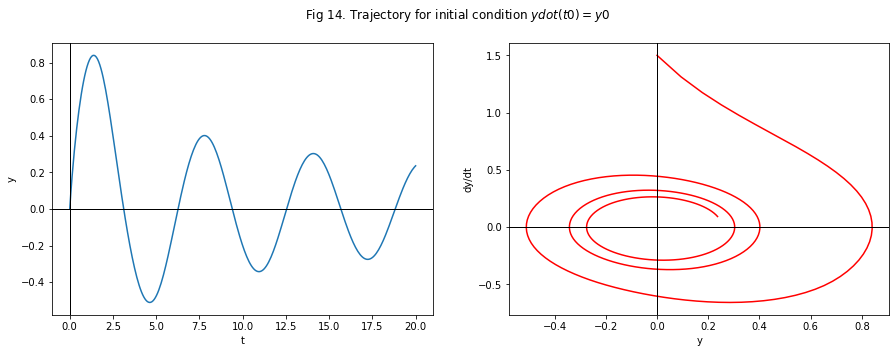

In [38]:
#@title Plot trajectories in the phase space (change the slider and run!)
y0 = 1.5 #@param {type:"slider", min:0.1, max:4, step:0.2}

# convert to function that scipy is able to interpret
def system(t, V, b=1):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  y1, y2 = V 
  return [y2, -b * y2**3 - y1]

# set number of evaluation points
timeseries = np.linspace(0,20,300) 

# solve IVP with pythons equivalent of ode45
ivp_sol = solve_ivp(system, t_span=[0,50], y0=[0,y0], t_eval=timeseries) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Fig 14. Trajectory for initial condition $ydot(t0)=y0$');
ax1.plot(ivp_sol.t, ivp_sol.y[0], '-');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.set_ylabel('y')

ax2.plot(ivp_sol.y[0], ivp_sol.y[1], '-r');
ax2.axvline(x=0, color='k', linestyle='-', lw=1)
ax2.axhline(y=0, color='k', linestyle='-', lw=1)
ax2.set_xlabel('y')
ax2.set_ylabel('dy/dt');

### Conclusion 3c)

----

Solving this second order nonlinear differential equation was tough (believe us, we tried). Luckily, we can discover the stability of the fixed point at the origin in a qualitative fashion, by considering a few different trajectories in phase space. 

Through playing around with the above interative visualisation for different trajectories in the phase space (try changing the slider from $y0 = 0.1$ to $y=1.6$ for example) we conclude that the fixed point is a stable fixed point. More specifically, it is an attractor as solutions will go there over time. 


```
By Daphne Cornelisse & Kyra Evers
November 12, 2020
```